In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
# path to file
fn = 'data/events_anomalydetection.h5'

In [3]:
# Only load the first couple events for feature exploration
df = pandas.read_hdf(fn,stop=100000)
print(df.shape)
print("Memory in GB:",sum(df.memory_usage(deep=True)) / (1024**3))

(100000, 2101)
Memory in GB: 1.5661120414733887


In [4]:
# Separate background and signal; discard flag column
df_bg = df[df[2100] == 0.0].iloc[:,:-1]
df_s = df[df[2100] == 1.0].iloc[:,:-1]
df = df.iloc[:,:-1]

In [5]:
print("Background shape: " + str(df_bg.shape))
print("Signal shape: " + str(df_s.shape))
print("Percent of signal in data: " + str(df_s.shape[0] / df.shape[0] * 100) + "%")

Background shape: (90941, 2100)
Signal shape: (9059, 2100)
Percent of signal in data: 9.059000000000001%


In [6]:
# Isolate pT, eta, and phi

df_pt = df.iloc[:,::3].to_numpy()
df_eta = df.iloc[:,1::3].to_numpy()
df_phi = df.iloc[:,2::3].to_numpy()

df_bg_pt = df_bg.iloc[:,::3].to_numpy()
df_bg_eta = df_bg.iloc[:,1::3].to_numpy()
df_bg_phi = df_bg.iloc[:,2::3].to_numpy()

df_s_pt = df_s.iloc[:,::3].to_numpy()
df_s_eta = df_s.iloc[:,1::3].to_numpy()
df_s_phi = df_s.iloc[:,2::3].to_numpy()

In [7]:
# Compute constitutent cartesian momenta

df_px = df_pt * np.cos(df_phi)
df_py = df_pt * np.sin(df_phi)
df_pz = df_pt * np.sinh(df_eta)

df_bg_px = df_bg_pt * np.cos(df_bg_phi)
df_bg_py = df_bg_pt * np.sin(df_bg_phi)
df_bg_pz = df_bg_pt * np.sinh(df_bg_eta)

df_s_px = df_s_pt * np.cos(df_s_phi)
df_s_py = df_s_pt * np.sin(df_s_phi)
df_s_pz = df_s_pt * np.sinh(df_s_eta)

In [8]:
# Compute jet cartesian momenta

j_px = df_px.sum(axis = 1)
j_py = df_py.sum(axis = 1)
j_pz = df_pz.sum(axis = 1)

j_bg_px = df_bg_px.sum(axis = 1)
j_bg_py = df_bg_py.sum(axis = 1)
j_bg_pz = df_bg_pz.sum(axis = 1)

j_s_px = df_s_px.sum(axis = 1)
j_s_py = df_s_py.sum(axis = 1)
j_s_pz = df_s_pz.sum(axis = 1)

In [9]:
# Compute jet pT, eta, and phi

j_pt = np.sqrt(j_px ** 2 + j_py ** 2)
j_phi = np.arctan2(j_py, j_px)
j_eta = np.arcsinh(j_pz / j_pt)

j_bg_pt = np.sqrt(j_bg_px ** 2 + j_bg_py ** 2)
j_bg_phi = np.arctan2(j_bg_py, j_bg_px)
j_bg_eta = np.arcsinh(j_bg_pz / j_bg_pt)

j_s_pt = np.sqrt(j_s_px ** 2 + j_s_py ** 2)
j_s_phi = np.arctan2(j_s_py, j_s_px)
j_s_eta = np.arcsinh(j_s_pz / j_s_pt)

In [10]:
def makeplot(main, bg, s, title, xaxis, r = None):
    bg = bg.flatten()
    bg = bg[bg != 0]

    s = s.flatten()
    s = s[s != 0]

    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel("Prob. Density (a.u.)")

    bins = np.histogram_bin_edges(main, bins = 'auto')

    if r is None:
        r = (main.min(), main.max())

    plt.hist(bg, bins = len(bins) - 1, range = r, histtype = "step", color = "tab:green", label = "background", density = True)
    plt.hist(s, bins = len(bins) - 1, range = r, histtype = "step", color = "tab:red", label = "signal", density = True)
    plt.legend()
    plt.savefig("features/" + title + ".png")
    plt.show()
    plt.clf()

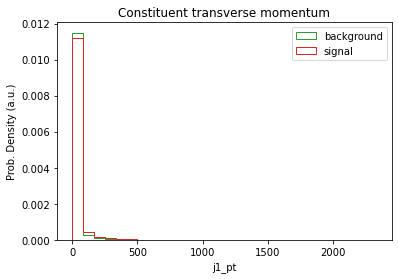

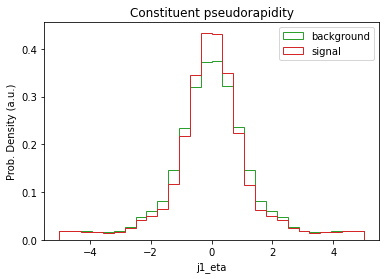

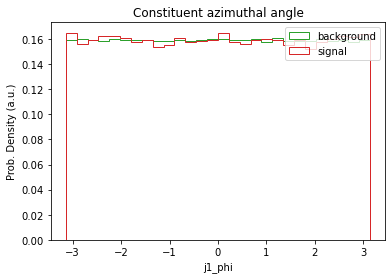

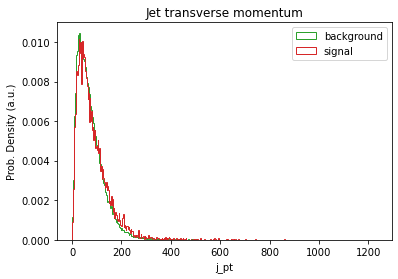

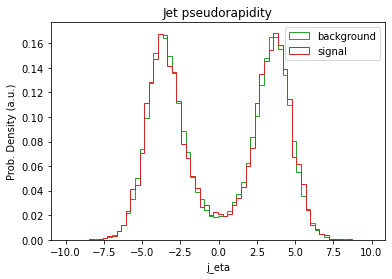

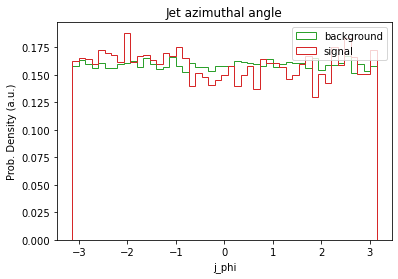

<Figure size 432x288 with 0 Axes>

In [11]:
makeplot(df_pt, df_bg_pt, df_s_pt, "Constituent transverse momentum", "j1_pt")
makeplot(df_eta, df_bg_eta, df_s_eta, "Constituent pseudorapidity", "j1_eta")
makeplot(df_phi, df_bg_phi, df_s_phi, "Constituent azimuthal angle", "j1_phi")

makeplot(j_pt, j_bg_pt, j_s_pt, "Jet transverse momentum", "j_pt")
makeplot(j_eta, j_bg_eta, j_s_eta, "Jet pseudorapidity", "j_eta")
makeplot(j_phi, j_bg_phi, j_s_phi, "Jet azimuthal angle", "j_phi")